# Heart Disease Prediction

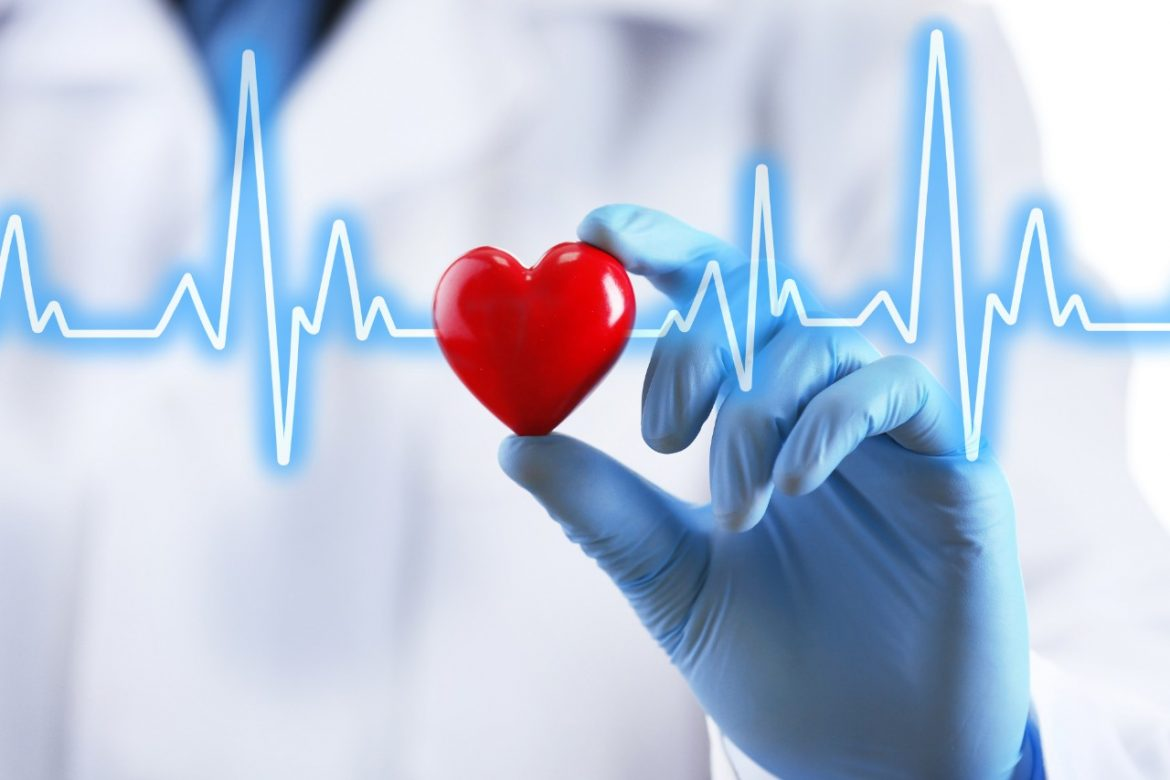

# Table of Contents

- [Loading Packages](#Loading-Packages)
- [Understanding Data](#Understanding-Data)
- [Data Cleaning](#Data-Cleaning)
- [Data Visualizations](#Data-Visualizations)
- [Data Preprocessing](#Data-Preprocessing)
- [Training Models](#Training-Models)
- [Evaluating Models](#Evaluating-Models)
    - [Linear Support Vector Machine Model](#Linear-Support-Vector-Machine-Model)
    - [Logistic Regression Model](#Logistic-Regression-Model)

## Loading Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from time import perf_counter

from IPython.display import Markdown, display
def printmd(string):
    # Print with markdown
    display(Markdown(string))

import warnings
warnings.filterwarnings('ignore')

In [29]:
# Loading Data
df = pd.read_csv('heart.csv')

## Understanding Data

1. age: Age in years 
2. sex: Gender (1 = male, 0 = female) 
3. cp: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic) 
4. trestbps: Resting blood pressure 
5. chol: Cholesterol in mg/dl 
6. fbs: Fasting blood sugar (> 120 mg/dl, 1 = true, 0 = false) 
7. restecg: Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = probable left ventricular hypertrophy) 
8. thalach: Maximum heart rate achieved 
9. exang: Exercise induced angina (1 = yes, 0 = no) 
10. oldpeak: ST depression induced by exercise relative to rest 
11. slope: The slope of the peak exercise ST segment ( 1 = upsloping, 2 = flat, 3 = downsloping) 
12. ca: The number of major vessels (0-3) 
13. thal: Thalassemia, a blood disorder (3 = normal, 6 = fixed defect, 7 = reversible defect) 
14. target: Heart Disease (1 = yes, 0 = no) 

In [30]:
# The shape of the dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (303, 14)


In [31]:
# Preview of the first 5 rows of dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Cleaning

In [34]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
# Check for duplicate values
df.duplicated().sum()

1

In [36]:
# Drop duplicate observation
df = df.drop_duplicates()

In [39]:
# Renaming columns to more convenient names
df.columns = ['age', 'sex', 'chest_pain', 'resting_bp', 'cholestrol', 'fast_blood_sug', 'rest_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [40]:
df.head()

,age,sex,chest_pain,resting_bp,cholestrol,fast_blood_sug,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Visualizations

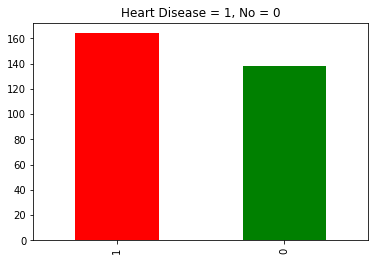

In [41]:
# Heart Disease Cases ( 1 - Yes, 0 - No)
ax = df['target'].value_counts().plot.bar(color=['r','g'])
ax = plt.title('Heart Disease = 1, No = 0')
plt.show()

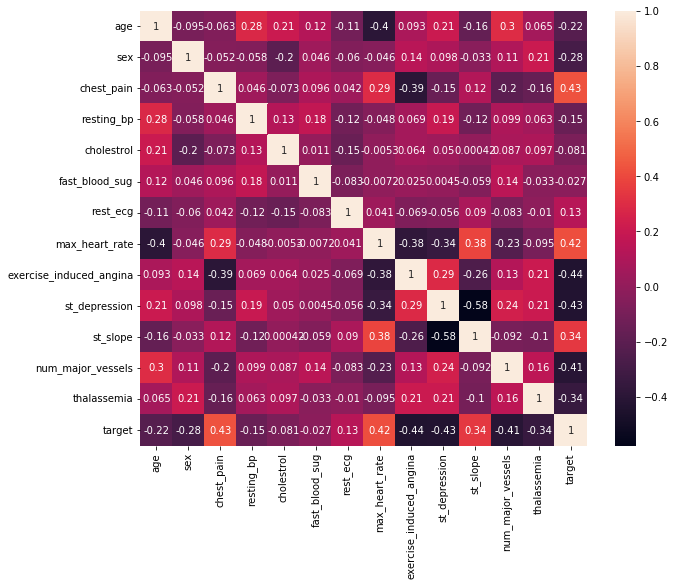

In [42]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

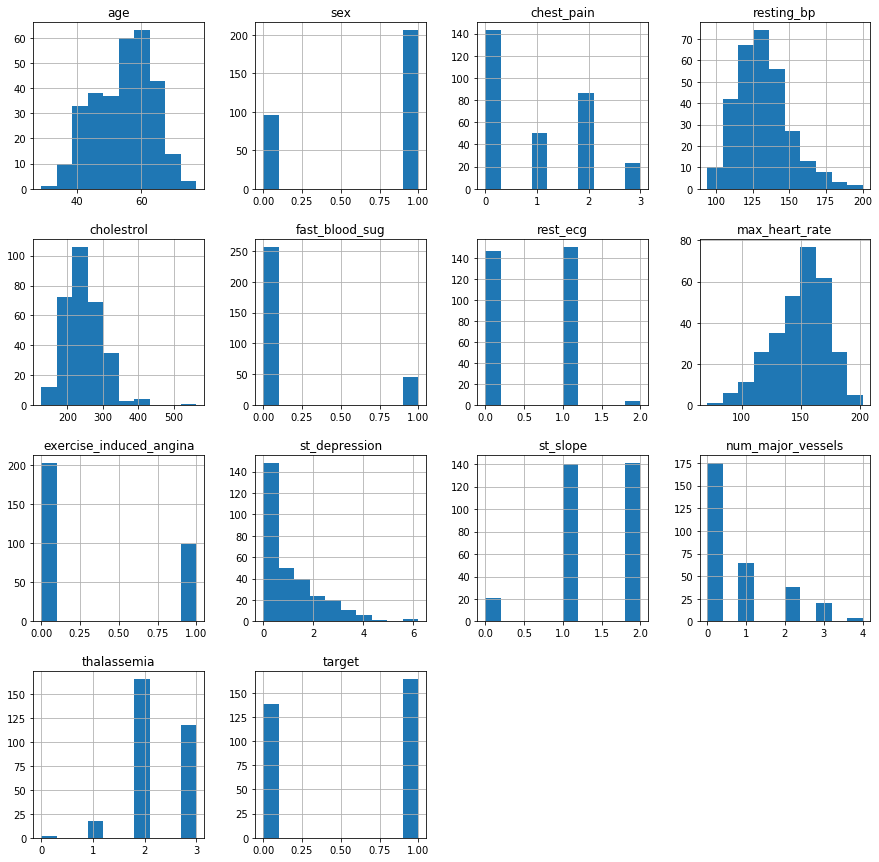

In [43]:
# Distributions
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
g = df.hist(ax=ax)

## Data Preprocessing

In [44]:
# Converting variables into dummy variables.  Although, we don't have any strings in our dataset, it is still necessary for our model since the interger observations represent categorical variables
df = pd.get_dummies(df, columns=['sex', 'chest_pain', 'fast_blood_sug', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia'])

In [45]:
df.columns

Index(['age', 'resting_bp', 'cholestrol', 'max_heart_rate', 'st_depression',
       'target', 'sex_0', 'sex_1', 'chest_pain_0', 'chest_pain_1',
       'chest_pain_2', 'chest_pain_3', 'fast_blood_sug_0', 'fast_blood_sug_1',
       'rest_ecg_0', 'rest_ecg_1', 'rest_ecg_2', 'exercise_induced_angina_0',
       'exercise_induced_angina_1', 'st_slope_0', 'st_slope_1', 'st_slope_2',
       'num_major_vessels_0', 'num_major_vessels_1', 'num_major_vessels_2',
       'num_major_vessels_3', 'num_major_vessels_4', 'thalassemia_0',
       'thalassemia_1', 'thalassemia_2', 'thalassemia_3'],
      dtype='object')

In [46]:
# Feature scaling
scaler = StandardScaler()
cols_to_scale = ['age', 'resting_bp', 'cholestrol', 'max_heart_rate', 'st_depression']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [47]:
df.head()

,age,resting_bp,cholestrol,max_heart_rate,st_depression,target,sex_0,sex_1,chest_pain_0,chest_pain_1,...,st_slope_2,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [48]:
# Splitting dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size=0.2)

## Training Models

In [49]:
models = {
    "Logistic Regr": {"model": LogisticRegression(), "perf":0},
    "KNN": {"model": KNeighborsClassifier(), "perf":0},
    "Decision Tree": {"model": DecisionTreeClassifier(), "perf":0},
    "SVM (Linear)": {"model": LinearSVC(), "perf":0},
    "SVM (RBF)": {"model": SVC(), "perf":0},
    "Random Forest": {"model": RandomForestClassifier(), "perf":0},
    "Gradient Boost": {"model": GradientBoostingClassifier(), "perf":0},
    "XGBoost": {"model": XGBClassifier(eval_metric='mlogloss'), "perf":0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train, y_train)
    duration = perf_counter() - start
    duration = round(duration, 2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

Logistic Regr        trained in 0.03 sec
KNN                  trained in 0.01 sec
Decision Tree        trained in 0.01 sec
SVM (Linear)         trained in 0.03 sec
SVM (RBF)            trained in 0.01 sec
Random Forest        trained in 0.04 sec
Gradient Boost       trained in 0.14 sec
XGBoost              trained in 174.93 sec


In [50]:
model_acc = []
for name, model in models.items():
    model_acc.append([name, model["model"].score(X_test, y_test), model["perf"]])

## Evaluating Models

In [51]:
df_acc = pd.DataFrame(model_acc)
df_acc.columns = ['Model', 'Accuracy', 'Training Time (sec)']
df_acc.sort_values(by = 'Accuracy', ascending=False, inplace=True)
df_acc.reset_index(drop=True, inplace=True)
df_acc

,Model,Accuracy,Training Time (sec)
0,Logistic Regr,0.885246,0.03
1,SVM (Linear),0.885246,0.03
2,SVM (RBF),0.836066,0.01
3,Random Forest,0.836066,0.04
4,XGBoost,0.819672,174.93
5,Gradient Boost,0.803279,0.14
6,KNN,0.754098,0.01
7,Decision Tree,0.704918,0.01


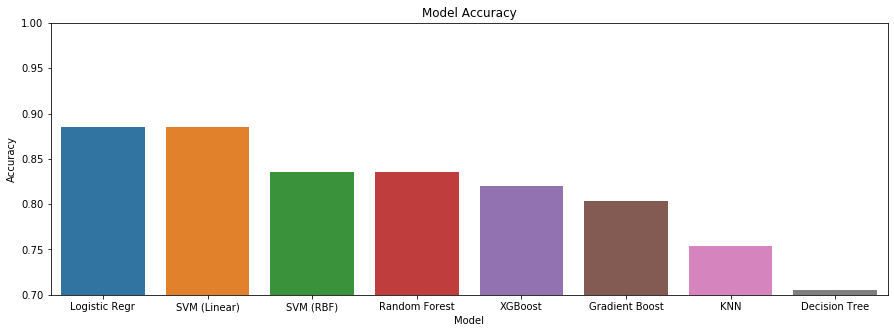

In [52]:
plt.figure(figsize=(15, 5))
sns.barplot(x = 'Model', y = 'Accuracy', data = df_acc)
plt.title('Model Accuracy')
plt.ylim(0.7, 1)
plt.show()

- For our predictions, we will utilize both a linear SVM model and Logistic Regression Model

## Linear Support Vector Machine Model

In [53]:
lin_svm = LinearSVC()
lin_svm.fit(X_train, y_train)

y_pred = lin_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [54]:
printmd(f'### Linear Support Vector Machine Accuracy: {round(accuracy_score(y_test, y_pred),3)*100}%')

### Linear Support Vector Machine Accuracy: 88.5%

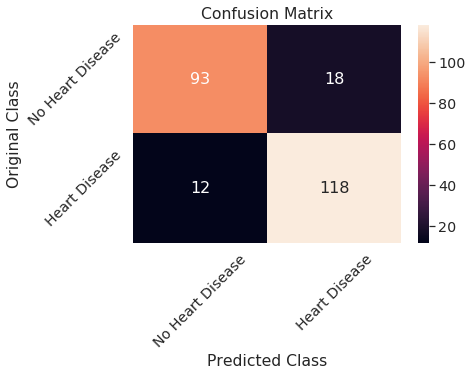

In [55]:
plt.figure(figsize=(6, 4))
df1 = pd.DataFrame(confusion_matrix(y_train, lin_svm.predict(X_train)), range(2), range(2))
sns.set(font_scale=1.3)
ax = sns.heatmap(df1, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('Original Class')
ax.xaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'], rotation=45)
ax.yaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'], rotation=45)
plt.show()

## Logistic Regression Model

In [56]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred1 = log_reg.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [57]:
printmd(f'### Logistic Regression Accuracy: {round(accuracy_score(y_test, y_pred1),3)*100}%')

### Logistic Regression Accuracy: 88.5%

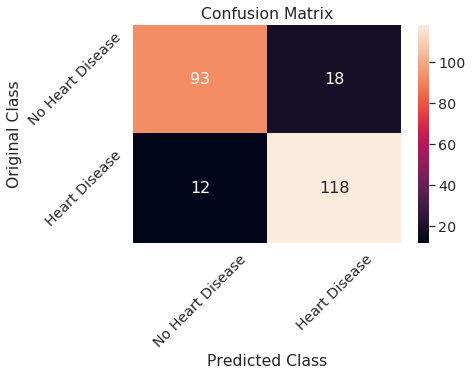

In [58]:
plt.figure(figsize=(6, 4))
df_ = pd.DataFrame(confusion_matrix(y_train, log_reg.predict(X_train)), range(2), range(2))
sns.set(font_scale=1.3)
ax = sns.heatmap(df1, annot=True, annot_kws={"size": 16}, fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('Original Class')
ax.xaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'], rotation=45)
ax.yaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'], rotation=45)
plt.show()